In [1]:
from active_planner import ActivePlanner

Using TensorFlow backend.


Failed to import pyassimp, see https://github.com/ros-planning/moveit/issues/86 for more info


In [2]:

from cv_bridge import CvBridge, CvBridgeError
from sklearn.gaussian_process import GaussianProcessRegressor 
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages') # in order to import cv2 under python3
import cv2
sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages') # append back in order to import rospy
import rospy 
import message_filters
import argparse
from add_pts import PlanningGraph
from sensor_msgs.msg import Image
import path_plan as pp 
from sensor_msgs.msg import JointState
import numpy as np
import moveit_commander
import random
import threading 
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
from sklearn.gaussian_process.kernels import RBF
from keras.applications.inception_v3 import preprocess_input

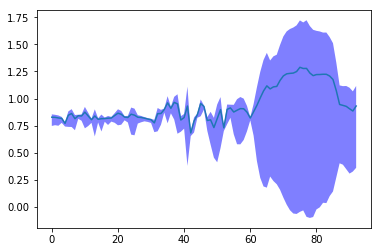

best view: (54, 0.0)
saving rewards in: rewards_liquid_1.csv
rewards: 0.8070994,0.84258866,0.8090868,0.8090868,0.89243877,0.89010733,0.7938401,0.81761307,0.8055482,0.8055482,0.79709595,0.79473686,0.83487505,0.7613242,0.7987646,0.6703644,0.91758245,0.7184306,0.7184306,0.81406206,0.88069266, array: [0.8070994, 0.84258866, 0.8090868, 0.8090868, 0.89243877, 0.89010733, 0.7938401, 0.81761307, 0.8055482, 0.8055482, 0.79709595, 0.79473686, 0.83487505, 0.7613242, 0.7987646, 0.6703644, 0.91758245, 0.7184306, 0.7184306, 0.81406206, 0.88069266]


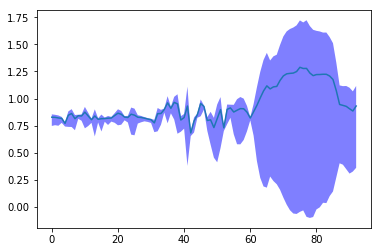

reward: 0.88069266
current (-3.3398097197162073, -2.2812097708331507, 1.767286777496338, -2.929500404988424, -1.7645657698260706, 0.11146602779626846), next None
rewards: [0.88069266]
trajectory: []
entering callback
reward: 0.88069266
current (-3.3398097197162073, -2.2812097708331507, 1.767286777496338, -2.929500404988424, -1.7645657698260706, 0.11146602779626846), next None
rewards: [0.88069266, 0.88069266]
trajectory: []
entering callback
reward: 0.88069266
current (-3.3398097197162073, -2.2812097708331507, 1.767286777496338, -2.929500404988424, -1.7645657698260706, 0.11146602779626846), next None
rewards: [0.88069266, 0.88069266, 0.88069266]
trajectory: []
entering callback
reward: 0.88069266
current (-3.3398097197162073, -2.2812097708331507, 1.767286777496338, -2.929500404988424, -1.7645657698260706, 0.11146602779626846), next None
rewards: [0.88069266, 0.88069266, 0.88069266, 0.88069266]
trajectory: []
entering callback
reward: 0.88069266
current (-3.3398097197162073, -2.28120977

reward: 0.87685287
current (-3.338994089757101, -2.281797234212057, 1.7672748565673828, -2.929500404988424, -1.7645776907550257, 0.11151396483182907), next None
rewards: [0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287]
trajectory: []
entering callback
reward: 0.87685287
current (-3.338994089757101, -2.281797234212057, 1.7672748565673828, -2.929500404988424, -1.7645776907550257, 0.11151396483182907), next None
rewards: [0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287]
trajectory: []
entering callback


reward: 0.87897956
current (-3.3389702478991907, -2.281785313283102, 1.767298698425293, -2.9295242468463343, -1.7645896116839808, 0.11153756082057953), next None
rewards: [0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.87897956]
trajectory: []
entering callback
reward: 0.87897956
current (-3.3389702478991907, -2.281785313283102, 1.767298698425293, -2.9295242468463343, -1.7645896116839808, 0.11153756082057953), next None
rewards: [0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 

reward: 0.88345474
current (-3.33901817003359, -2.281797234212057, 1.767286777496338, -2.9295361677752894, -1.7646015326129358, 0.11151396483182907), next None
rewards: [0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.88069266, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.8763606, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.87685287, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.8789732, 0.87897956, 0.87897956, 0.87897956, 0.87897956, 0.87897956, 0.87897956, 0.87897956, 0.87897956, 0.87897956, 0.87897956, 0.88345474, 0.88345474, 0.88345474]
trajectory: []
entering callback
reward: 0.88345474
current (-3.33901817003359, -2.281797234212057, 1.767286777496338, -2.9295361677752894, -1.7646015326129358, 0.11151396483182907), next None
rewards: [0.88069266, 0.88069266,

In [3]:
if __name__ == "__main__":

    parser = argparse.ArgumentParser()
    parser.add_argument("--vfile", default="test_graph_pts.npy", help="File path for saving vertices")
    parser.add_argument("--efile", default="test_graph_edges.npy", help="File path for saving edges")
    parser.add_argument("--robot_name", default="ur10", help="Name of robot")
    args, unknown_args = parser.parse_known_args()

    targets = ['liquid.jpg'] #, 'left0000.jpg']
    target_names = ['liquid_1'] #, 'torso']

    num_views = 20
    num_trials = 10

    for t, n in zip(targets, target_names):
        print("t, n: {}, {}".format(t, n))
        # send to initial position
        target_im = cv2.imread(t)
        #print(np.shape(np.array(target_im)))
        #print(target_im)
        cv2.imshow('target', target_im)
        ap = ActivePlanner(target_im, args.vfile, args.efile, args.robot_name, n, init_pose=None, visualize=True)

        for i in range(0, num_trials):
            print("trial: " + str(i))
            ap.run(num_views, cycle=False)
            ap.reset()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages') # in order to import cv2 under python3
import cv2
sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages') # append back in order to import rospy


In [12]:
file_prefix = "liquidliquid"
rewards = np.loadtxt(file_prefix + "_rewards.csv")
trajectories = np.load(file_prefix + "_trajectory.csv", allow_pickle=True)
#images = np.load(file_prefix + "_images.csv")
num_trials, ep_length = np.shape(rewards)

ValueError: could not convert string to float: '0.83336824,0.8303409,0.8310805,0.8275986,0.8272544,0.8251424,0.82862574,0.83780605,0.8307642,0.8289331,0.8276714,0.8303267,0.8277697,0.82878953,0.83227307,0.83189416,0.8180465,0.8191917,0.8222119,0.82031983,0.825236,0.8199501,0.81674665,0.82108223,0.81990004,0.82703024,0.818052,0.823254,0.8362148,0.836816,0.83109033,0.834984,0.8318432,0.83283436,0.8358144,0.8334192,0.82719624,0.83127177,0.8340505,0.83344346,0.8335169,0.8320617,0.8303463,0.82815903,0.80806553,0.8007608,0.8020847,0.80176497,0.80430686,0.8089712,0.80699766,0.83594525,0.8370884,0.8326457,0.82987636,0.8330103,0.8317739,0.83507776,0.8313953,0.8213223,0.81885374,0.8205799,0.81319237,0.8182825,0.8152557,0.82368743,0.8201652,0.8216738,0.8330754,0.8321267,0.8322496,0.83660376,0.838106,0.8356315,0.8337243,0.84111947,0.8071719,0.7999103,0.8037868,0.80299664,0.8047842,0.80615085,0.8031217,0.80500394,0.7986932,0.8023737,0.82549,0.821888,0.82582366,0.8208721,0.82585853,0.8262333,0.8244711,0.82656807,0.82577527,0.8231527,0.822621,0.82481223,0.8249791,0.82406825,0.82260215,0.82117486,0.82034045,0.82351196,0.8215254,0.8209384,0.81501806,0.81725264,0.822462,0.81953585,0.8207663,0.81891954,0.8192144,0.8229104,0.82147115,0.8178256,0.81976634,0.8185153,0.8192066,0.83625895,0.84022945,0.84082663,0.84102833,0.8432544,0.84089214,0.8429333,0.8441931,0.843055,0.8395826,0.8411355,0.84163207,0.84244585,0.840597,0.8411263,0.84129083,0.84172195,0.84050053,0.8413176,0.8423767,0.84509397,0.8428587,0.82983714,0.8289705,0.83453834,0.8318256,0.829991,0.82871854,0.8289716,0.8273985,0.83042526,0.832666,0.82799023,0.831069,0.8299908,0.82830584,0.8252431,0.8299461,0.8275362,0.8331452,0.8174398,0.8152302,0.812246,0.8162324,0.82065994,0.8199739,0.8200864,0.814578,0.8125245,0.8159416,0.8134837,0.8209958,0.81418675,0.8193444,0.8314315,0.8256581,0.831531,0.8299304,0.82825977,0.8304936,0.8272929,0.83079934,0.82994664,0.8276597,0.82447046,0.81899554,0.8170533,0.8182579,0.815705,0.8159778,0.81408554,0.81949323,0.77697015,0.7851978,0.78446877,0.77905375,0.7833454,0.7794382,0.78146863,0.7794847,0.77987486'

In [ ]:
for i in range(num_trials):
    plt.figure()
    plt.plot(range(0, ep_length), rewards[i, :])

In [ ]:
def visualizeTrajectory(trial):
    for im in images:
        cv2.imshow(im)